In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("online_retail_II.xlsx")

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.shape

(525461, 8)

In [5]:
df.dropna(inplace = True)

In [6]:
df.shape

(417534, 8)

<b> We will remove all the data in invoice which start with "C" as these are cancelled orders.

In [7]:
cancel_index = df[df.Invoice.astype(str).str.startswith("C")].index

In [8]:
df.drop(cancel_index, inplace = True)

In [9]:
df.shape

(407695, 8)

In [10]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
df.Country.value_counts()[:10]

Country
United Kingdom    370951
EIRE                8507
Germany             7661
France              5470
Netherlands         2730
Spain               1235
Switzerland         1170
Belgium             1038
Portugal             984
Sweden               868
Name: count, dtype: int64

In [12]:
col = ["United Kingdom", "EIRE", "Germany", "France", "Netherlands", "Spain", "Switzerland", "Belgium", "Portugal", "Sweden"]

<b> Countplot of top 10 countries which are having the largest number of customers

<Axes: xlabel='count', ylabel='Country'>

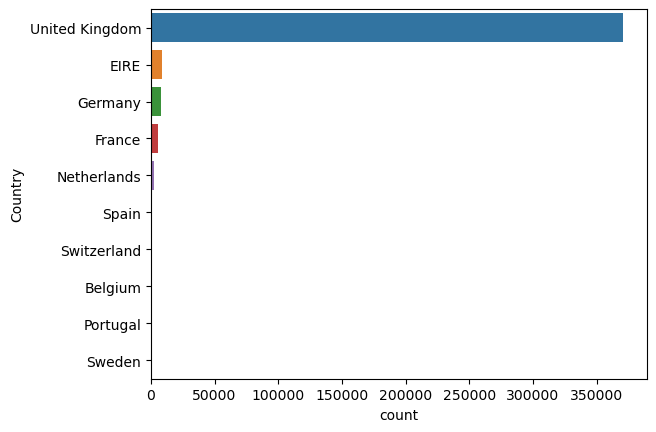

In [13]:
sns.countplot(y = df.Country, order = df.Country.value_counts().iloc[:10].index)

In [14]:
df["Year"] = df.InvoiceDate.dt.year

In [15]:
df["Month"] = df.InvoiceDate.dt.month

In [16]:
df["Day"] = df.InvoiceDate.dt.day

In [17]:
df["Hour"] = df.InvoiceDate.dt.hour

In [18]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7


In [19]:
df["Total_Price"] = df.Quantity * df.Price

In [20]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Hour,Total_Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,30.0


<b> Best customers in terms of quantity and Total price

In [21]:
best_customer = df.groupby("Customer ID")[["Quantity", "Total_Price"]].sum().reset_index()

In [22]:
best_customer

,Customer ID,Quantity,Total_Price
0,12346.0,70,372.86
1,12347.0,828,1323.32
2,12348.0,373,222.16
3,12349.0,993,2671.14
4,12351.0,261,300.93
...,...,...,...
4309,18283.0,336,641.77
4310,18284.0,494,461.68
4311,18285.0,145,427.00
4312,18286.0,608,1296.43


In [23]:
best_customer.sort_values("Total_Price", ascending=False, inplace = True)

In [24]:
best_customer.reset_index(drop = True, inplace = True)

#### Customers with highest number of purchase

<Axes: xlabel='Customer ID', ylabel='Total_Price'>

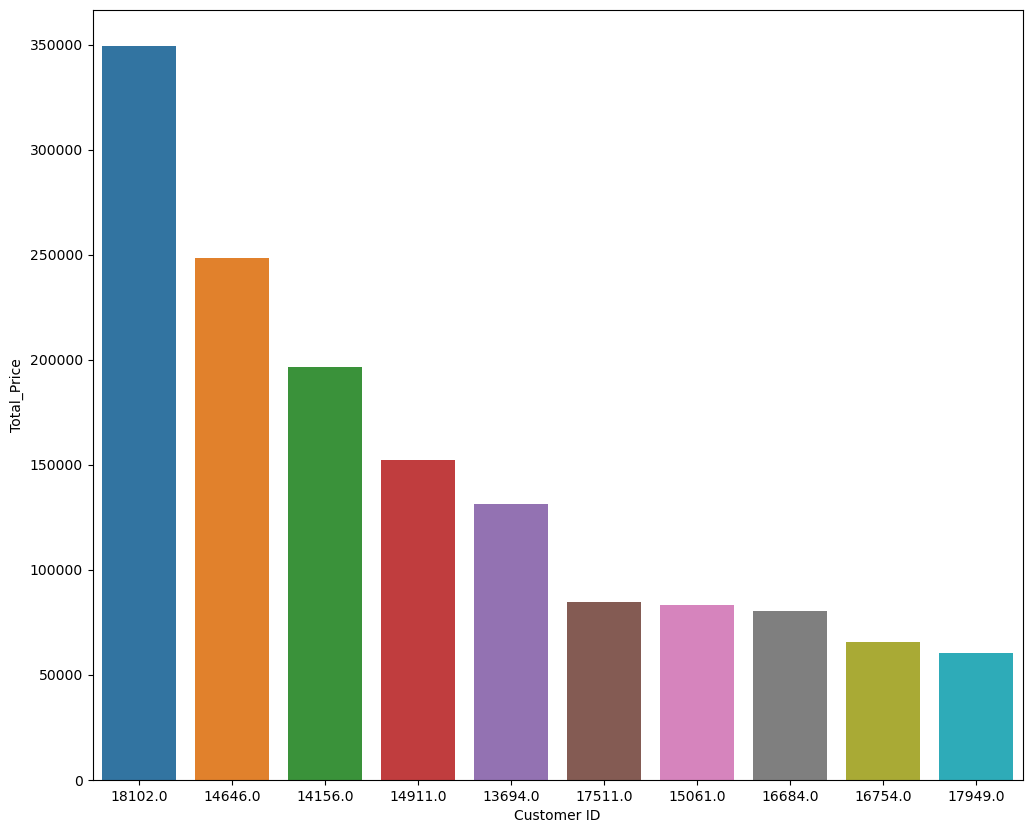

In [25]:
plt.figure(figsize = (12,10))
sns.barplot(x = "Customer ID", y = "Total_Price", data = best_customer, order = best_customer.sort_values("Total_Price", ascending = False)["Customer ID"][:10])

#### Items sold most in the shop

<Axes: xlabel='count', ylabel='Description'>

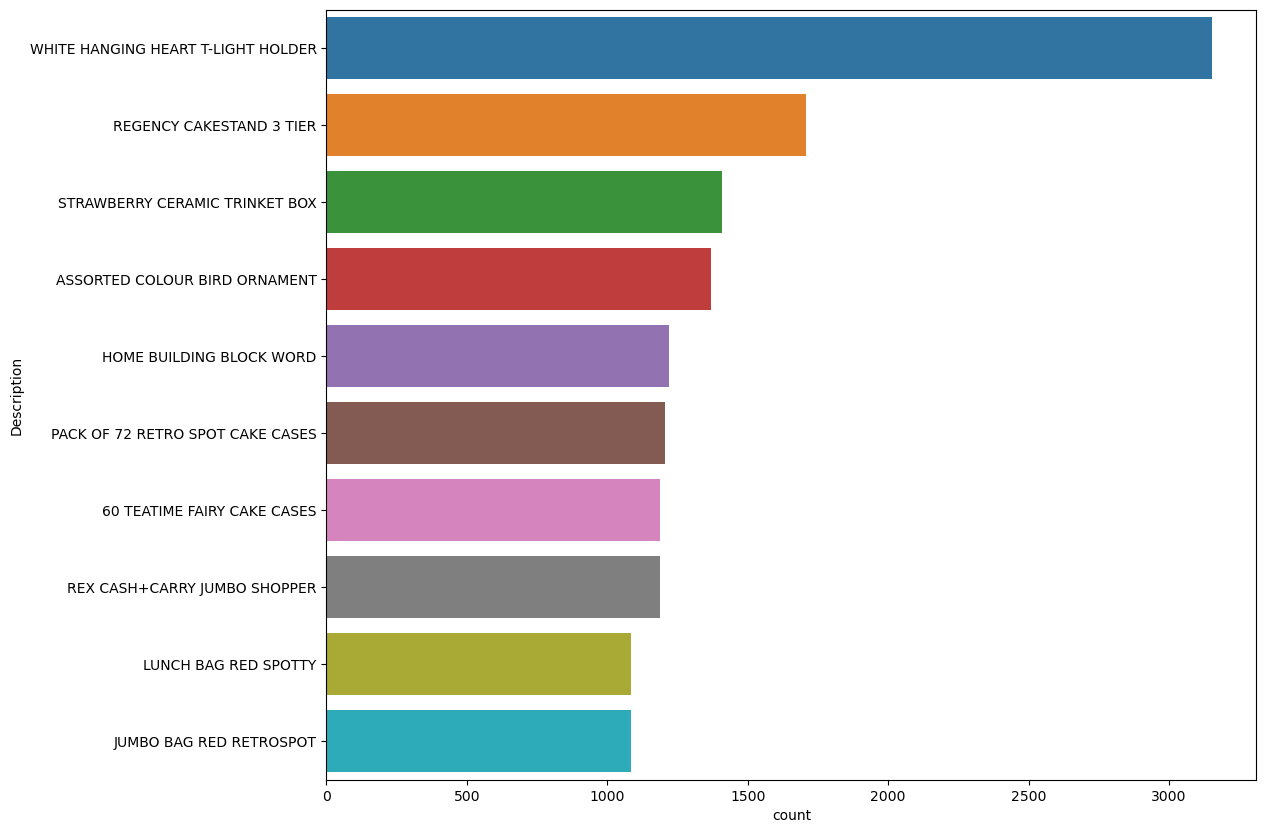

In [26]:
plt.figure(figsize = (12,10))
sns.countplot(y = df.Description, order = df.Description.value_counts().iloc[:10].index)

In [27]:
df.drop(df[df.duplicated() == True].index, inplace = True)

In [28]:
df.shape

(400947, 13)

In [29]:
last_date = max(df["InvoiceDate"])

In [30]:
last_date

Timestamp('2010-12-09 20:01:00')

#### Finding Recency, Frequency and Monetery:-
#### Recency = How recently customer has made a purchase.
#### Frequency = How often customer has made a purchase.
#### Monetery = How much money a customer spends on purchases

In [31]:
rfm = df.groupby("Customer ID")["InvoiceDate"].apply(lambda x : (last_date - max(x)).days).reset_index()

In [32]:
rfm["Frequency"] = df.groupby("Customer ID")["Invoice"].count().reset_index()["Invoice"]

In [33]:
rfm.rename(columns={"InvoiceDate": "Recency"}, inplace = True)

In [34]:
rfm["Monetery"] = df.groupby("Customer ID")["Total_Price"].sum().reset_index()["Total_Price"]

In [35]:
rfm.head()

,Customer ID,Recency,Frequency,Monetery
0,12346.0,164,33,372.86
1,12347.0,2,71,1323.32
2,12348.0,73,20,222.16
3,12349.0,42,102,2671.14
4,12351.0,10,21,300.93


In [36]:
rfm["r_score"] = pd.qcut(rfm["Recency"], 4, ['1', '2', '3', '4'])
rfm["f_score"] = pd.qcut(rfm["Frequency"], 4, ['4', '3', '2', '1'])
rfm["m_score"] = pd.qcut(rfm["Monetery"], 4, ['4', '3', '2', '1'])

In [37]:
rfm["rfm_score"] = rfm.r_score.astype(str) + rfm.f_score.astype(str) + rfm.m_score.astype(str)

In [38]:
rfm.head()

,Customer ID,Recency,Frequency,Monetery,r_score,f_score,m_score,rfm_score
0,12346.0,164,33,372.86,4,3,3,433
1,12347.0,2,71,1323.32,1,2,2,122
2,12348.0,73,20,222.16,3,3,4,334
3,12349.0,42,102,2671.14,2,1,1,211
4,12351.0,10,21,300.93,1,3,4,134


In [39]:
print("Best customers of retail shops: ", rfm.rfm_score[rfm.rfm_score == "111"].count())
print("Almost Lost Customers: ",rfm.rfm_score[rfm.rfm_score == "222"].count() )
print("Lost Customers(high paid): ", rfm.rfm_score[rfm.rfm_score == "441"].count())
print("Lost Customers(cheap): ", rfm.rfm_score[rfm.rfm_score == "444"].count())

Best customers of retail shops:  409
Almost Lost Customers:  160
Lost Customers(high paid):  8
Lost Customers(cheap):  386
